In [7]:
import pandas as pd
import numpy as np
import timeit
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.graph_objs as go
%matplotlib inline

In [50]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import warnings
warnings.simplefilter(action='ignore')

Instructions for updating:
non-resource variables are not supported in the long term


In [9]:

from keras.datasets import boston_housing

Using TensorFlow backend.


train = pd.read_csv("https://raw.githubusercontent.com/reejungkim/HousingPrice/master/train.csv", error_bad_lines=False)
train.head()

test = pd.read_csv("https://raw.githubusercontent.com/reejungkim/HousingPrice/master/test.csv", error_bad_lines=False)
test.head()

In [10]:
pd.DataFrame(boston_housing.load_data())

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

pd.DataFrame(x_train)

pd.DataFrame(y_train)

In [11]:
pd.set_option('display.max_columns', 100)

In [12]:
col_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [13]:
train_data = np.concatenate([x_train, y_train[:, np.newaxis]], axis=1)
#train_data = pd.concat( [pd.DataFrame(x_train), pd.DataFrame(y_train)], axis=1, ignore_index=True).values
test_data = np.concatenate([x_test, y_test[:, np.newaxis]], axis=1)

In [14]:
df_train = pd.DataFrame(train_data, columns=col_name)
df_test = pd.DataFrame(test_data, columns=col_name)

In [15]:
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [16]:
percentages = ['CRIM', 'ZN', 'INDUS', 'AGE', 'PTRATIO', 'LSTAT']

In [17]:
#normalizing data
for col in percentages:
    df_train[col] /=100
    df_test[col] /=100
    
df_train['B'] /=1000
df_train['TAX']/=10000
df_test['B'] /=1000
df_test['TAX']/=10000

In [18]:
x_train, y_train = df_train.values[:, :13], df_train.values[:, 13]
x_test, y_test = df_test.values[:, :13], df_test.values[:, 13]

In [19]:
df_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.037451,0.114802,0.111044,0.061881,0.557356,6.267082,0.690106,3.740271,9.440594,0.040590,0.184760,0.354783,0.127408,22.395050
std,0.092407,0.237677,0.068113,0.241238,0.117293,0.709788,0.279407,2.030215,8.698360,0.016637,0.022004,0.094111,0.072545,9.210442
min,0.000063,0.000000,0.004600,0.000000,0.385000,3.561000,0.029000,1.129600,1.000000,0.018800,0.126000,0.000320,0.017300,5.000000
25%,0.000814,0.000000,0.051300,0.000000,0.453000,5.874750,0.454750,2.077100,4.000000,0.027900,0.172250,0.374673,0.068900,16.675000
50%,0.002689,0.000000,0.096900,0.000000,0.538000,6.198500,0.785000,3.142300,5.000000,0.033000,0.191000,0.391250,0.113950,20.750000
75%,0.036748,0.125000,0.181000,0.000000,0.631000,6.609000,0.941000,5.118000,24.000000,0.066600,0.202000,0.396157,0.170925,24.800000
max,0.889762,1.000000,0.277400,1.000000,0.871000,8.725000,1.000000,10.710300,24.000000,0.071100,0.220000,0.396900,0.379700,50.000000


In [20]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.012325,0.000,0.0814,0.0,0.5380,6.142,0.917,3.9769,4.0,0.0307,0.210,0.39690,0.1872
1,0.000218,0.825,0.0203,0.0,0.4150,7.610,0.157,6.2700,2.0,0.0348,0.147,0.39538,0.0311
2,0.048982,0.000,0.1810,0.0,0.6310,4.970,1.000,1.3325,24.0,0.0666,0.202,0.37552,0.0326
3,0.000396,0.000,0.0519,0.0,0.5150,6.037,0.345,5.9853,5.0,0.0224,0.202,0.39690,0.0801
4,0.036931,0.000,0.1810,0.0,0.7130,6.376,0.884,2.5671,24.0,0.0666,0.202,0.39143,0.1465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.002198,0.000,0.0691,0.0,0.4480,5.602,0.620,6.0877,3.0,0.0233,0.179,0.39690,0.1620
400,0.001621,0.200,0.0696,0.0,0.4640,6.240,0.163,4.4290,3.0,0.0223,0.186,0.39690,0.0659
401,0.000347,0.350,0.0606,0.0,0.4379,6.031,0.233,6.6407,1.0,0.0304,0.169,0.36225,0.0783
402,0.021492,0.000,0.1958,0.0,0.8710,5.709,0.985,1.6232,5.0,0.0403,0.147,0.26195,0.1579


print(np.max(x_train, axis=1))

sns.pairplot(df_train)

In [21]:
from keras import models
from keras import layers

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [22]:


def create_model_01():
    model = models.Sequential()
    model.add(layers.Dense(64, input_dim=x_train.shape[1], activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [23]:
from keras.optimizers import Adam # Optimizer

def create_model_02():
    # create model
    model = Sequential()
    model.add(Dense(320, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(384, activation='relu'))
    model.add(Dense(352, activation='relu'))
    model.add(Dense(448, activation='relu'))
    model.add(Dense(160, activation='relu'))
    model.add(Dense(160, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'mape', metrics=['mae']) #'mse')
    return model

model = Sequential()

model.add(Dense(16, activation='sigmoid', input_shape=(13,)))
model.add(Dense(1, activation='linear'))

In [24]:
model = Sequential([
    Dense(250, input_shape=(13,)),
    Activation('sigmoid'),
    Dense(10),
    Activation('linear'),
    Activation('softmax'),
    Dense(1)
])


In [25]:

model = create_model_02()
model.summary()
#model.build(input_shape=(None,3))# build the model by calling the build method

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 320)               4480      
_________________________________________________________________
dense_5 (Dense)              (None, 384)               123264    
_________________________________________________________________
dense_6 (Dense)              (None, 352)               135520    
_________________________________________________________________
dense_7 (Dense)              (None, 448)               158144    
_________________________________________________________________
dense_8 (Dense)              (None, 160)               71840     
_________________________________________________________________
dense_9 (Dense)              (None, 160)               25760     
_________________________________________________________________
dense_10 (Dense)             (None, 32)               

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=.2)

history = model.fit(x_train, y_train, 
                    batch_size=100, epochs=20, 
                    validation_data=(x_valid, y_valid))

2022-05-22 22:17:36.376374: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA



Train on 323 samples, validate on 81 samples
Epoch 1/20
323/323 [==============================] - 0s 791us/step - loss: 100.5347 - mae: 22.6748 - val_loss: 98.2606 - val_mae: 21.3951
Epoch 2/20
323/323 [==============================] - 0s 94us/step - loss: 97.6867 - mae: 22.1763 - val_loss: 96.4483 - val_mae: 21.1032
Epoch 3/20
323/323 [==============================] - 0s 96us/step - loss: 95.8608 - mae: 21.8604 - val_loss: 94.3887 - val_mae: 20.7678
Epoch 4/20
323/323 [==============================] - 0s 94us/step - loss: 93.5460 - mae: 21.4641 - val_loss: 91.5941 - val_mae: 20.3165
Epoch 5/20
323/323 [==============================] - 0s 88us/step - loss: 90.5320 - mae: 20.9396 - val_loss: 87.7781 - val_mae: 19.7042
Epoch 6/20
323/323 [==============================] - 0s 95us/step - loss: 86.2197 - mae: 20.2100 - val_loss: 83.1738 - val_mae: 18.9040
Epoch 7/20
323/323 [==============================] - 0s 98us/step - loss: 80.6405 - mae: 19.2340 - val_loss: 78.3484 - val_mae: 1

model.compile(optimizer='sgd', loss='mse', metrics=['mape']) 
#sgd - stochastic gradient descent
#mse - mean square error
#mape - mean absolute percentage error

In [27]:
x_train.shape, x_valid.shape

((323, 13), (81, 13))

for i in  range(2):
    
    model = create_model_02()

    history = model.fit(x_train, y_train, batch_size=4, epochs=10, validation_data=(x_valid, y_valid))

    all_scores = []
    all_mae_histories = []

    mae_history = history.history['val_loss']
    all_mae_histories.append(mae_history)
    
    val_mse, val_mae = model.evaluate(x_valid, y_valid, verbose=0)
    all_scores.append(val_mae)

all_scores

num_epochs = 100

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history, 'r', label='aver_mae')
plt.title('MAE')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()

In [28]:
x_train.shape

(323, 13)

history.history

In [29]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mae,loss,mae,epoch
15,36.596558,7.443161,40.069212,9.425250,15
16,30.313841,5.995847,33.600792,7.794297,16
17,26.184322,5.100091,27.928989,6.439041,17
18,24.583376,4.935415,24.573919,5.692517,18
19,23.174313,4.963671,22.763408,5.541629,19


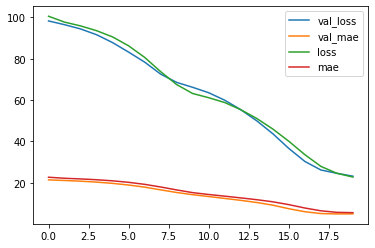

In [30]:
for name, value in history.history.items():
    plt.plot(value, label=name)
plt.legend()
plt.show()

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,100])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.ylim([0,100])
  plt.legend()
  plt.show()

plot_history(history)

## evaluate model

In [35]:
results = model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 77us/step


print('Loss: {:.6f} - MAPE: {:.6f}'.format(*results))

## list predicted value

In [37]:
test_pred = model.predict(x_test)

In [38]:
test_pred = np.squeeze(test_pred)

## compare predicted value to true value

In [43]:
for pred, true in zip(test_pred[:10], y_test):
    print('Pred: {:.6f} - True: {:.6f}'.format(pred,true))

Pred: 11.895083 - True: 7.200000
Pred: 16.713772 - True: 18.800000
Pred: 21.765892 - True: 19.000000
Pred: 17.214386 - True: 27.000000
Pred: 21.049202 - True: 22.200000
Pred: 16.702072 - True: 24.500000
Pred: 26.980358 - True: 31.200000
Pred: 23.711660 - True: 22.900000
Pred: 18.442877 - True: 20.500000
Pred: 12.726781 - True: 23.200000


## Save model

model_path = 'model.h5'
model.save(model_path)

In [44]:
from keras.models import load_model

loaded_model = load_model(model_path)

loaded_model.summary()

plt.figure(figsize=(7, 5))
plt.plot(x_test, y_test, '.y', x_test, test_pred, '.b')
plt.show()

train_pred = model.predict(x_train)
train_pred = np.squeeze(train_pred)

plt.figure(figsize=(7, 5))
plt.plot(x_train, y_train, '.r', x_train, train_pred, '.b')
plt.show()

In [47]:
import shap

In [48]:
# select backgroud for shap
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]
# DeepExplainer to explain predictions of the model
explainer = shap.DeepExplainer(model, background)
# compute shap values
shap_values = explainer.shap_values(x_test)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


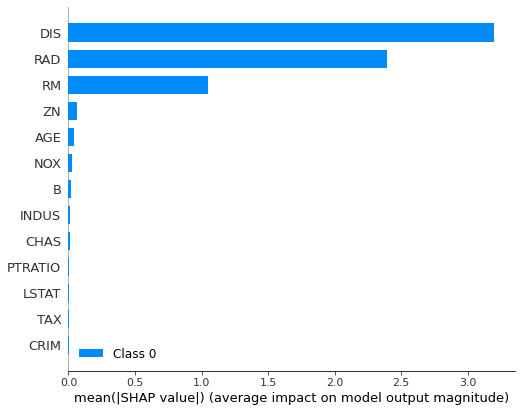

In [49]:
shap.summary_plot(shap_values, 
                  features=x_train, 
                  feature_names=col_name)